In [57]:
!pip install scikit-learn==1.3.1

  Obtaining dependency information for scikit-learn==1.3.1 from https://files.pythonhosted.org/packages/74/17/01347a4e2298edd6d152b79d4d042f902a618ccaf4c070f0a61999a26156/scikit_learn-1.3.1-cp310-cp310-macosx_10_9_x86_64.whl.metadata
Using cached scikit_learn-1.3.1-cp310-cp310-macosx_10_9_x86_64.whl (10.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# Loading the Boston house pricing dataset
boston_df = pd.read_csv('BostonHousing.csv')
boston_df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [60]:
type(boston_df)

pandas.core.frame.DataFrame

In [61]:
boston_df.rename(columns={'medv': 'Price'}, inplace=True)

In [62]:
boston_df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


Summarising the Dataset

In [63]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [64]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Check the Missing Values **Verry Verry Important**

In [65]:
boston_df.isnull().sum()
# sum is zero which means there are no null values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

###Exploratory Data Analysis
- Correlation is super important to understand what features are highly correlated with my labels
- Using highly Correlated data is good
- Correlation should be found between independent features
- Correlation should also be found between price and independent features

In [66]:
#Correlation ( Pearson Correlation )
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [67]:
# import seaborn as sns
# sns.pairplot(boston_df)

Text(0.5, 1.0, 'Correlation between Crime rate and Price')

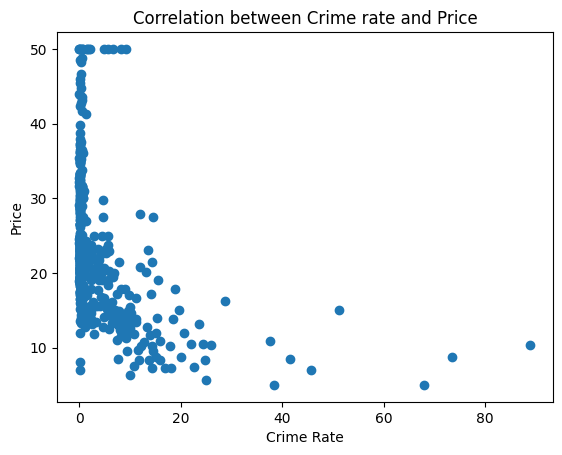

In [68]:
plt.scatter(boston_df['crim'],boston_df['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.title('Correlation between Crime rate and Price')

Text(0.5, 1.0, 'Correlation between Avg no. of rooms and Price')

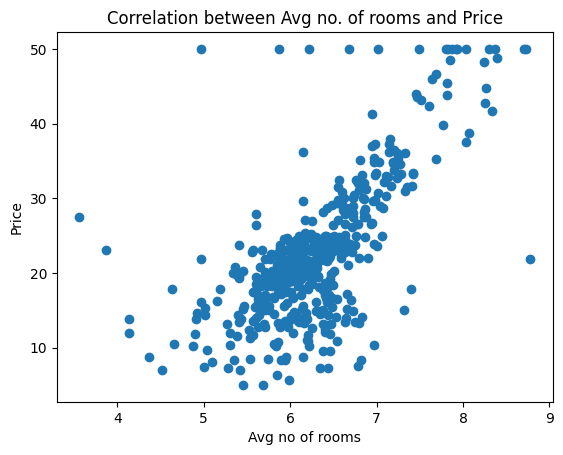

In [69]:
plt.scatter(boston_df['rm'],boston_df['Price'])
plt.xlabel('Avg no of rooms')
plt.ylabel('Price')
plt.title('Correlation between Avg no. of rooms and Price')

<Axes: xlabel='rm', ylabel='Price'>

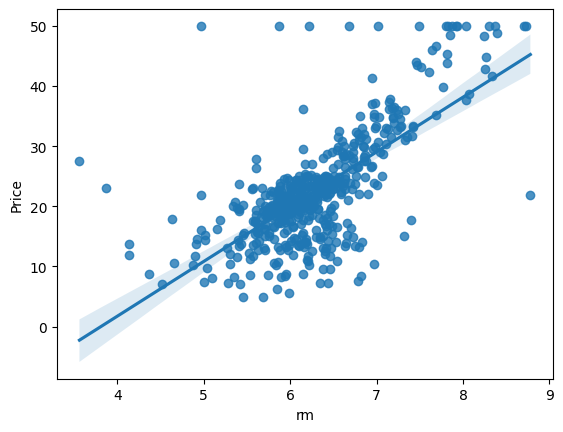

In [70]:
import seaborn as sns
sns.regplot(x='rm',y='Price',data=boston_df)
# This is a regression plot

<Axes: xlabel='lstat', ylabel='Price'>

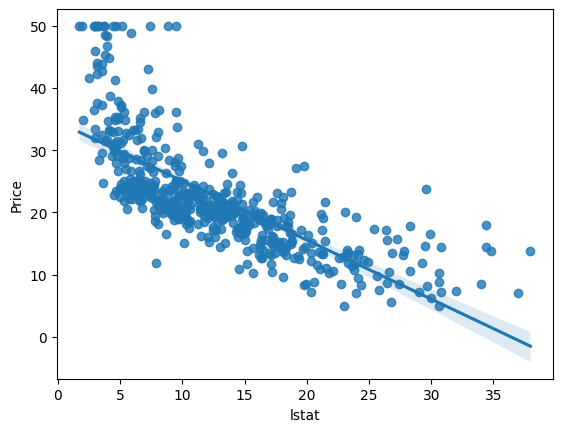

In [71]:
sns.regplot(x='lstat',y='Price',data=boston_df)
# This is a regression plot

<Axes: xlabel='chas', ylabel='Price'>

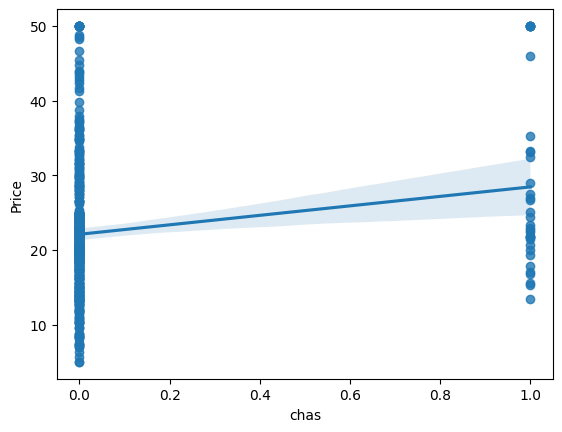

In [72]:
sns.regplot(x='chas',y='Price',data=boston_df)
# This is a regression plot

Linearity must be there in your dataset to create a better regression model

<Axes: xlabel='ptratio', ylabel='Price'>

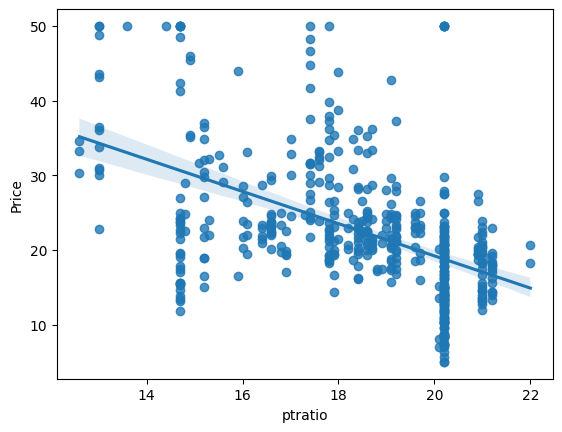

In [73]:
sns.regplot(x='ptratio',y='Price',data=boston_df)
# This is a regression plot

Dividing the features into dependent and independent features

In [74]:
X = boston_df.iloc[:,:-1]
Y = boston_df.iloc[:,-1]

Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

Standardising the data

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# X_test is not fitted because we dont want the model to know much about out test dataset

In [79]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

Training the Model

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
regression = LinearRegression()

In [82]:
regression.fit(X_train,Y_train)

LinearRegression()

In [83]:
# Print the coefficients and intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [84]:
print(regression.intercept_)

23.01581920903955


In [85]:
## On which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [86]:
## Prediction with Test data
Y_pred = regression.predict(X_test)

Plot between the predicted values and the test labels.
If we get a straight lines which means the predicted values are aligning quite well with the test data labels.

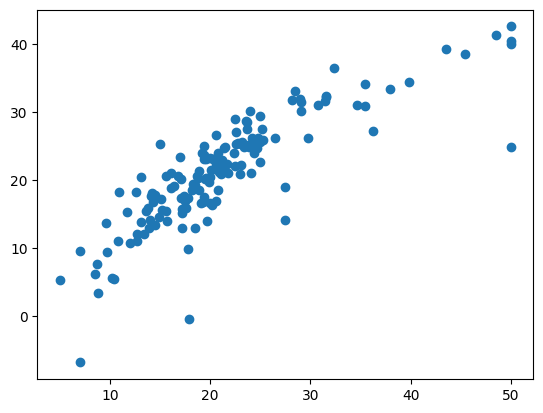

In [87]:
# plot a scatter plot for the predictions
plt.scatter(Y_test,Y_pred)

We will now plot a displot of residual errors between the predicted and test label values of the dataset.
The more this plot follows a normal distribution

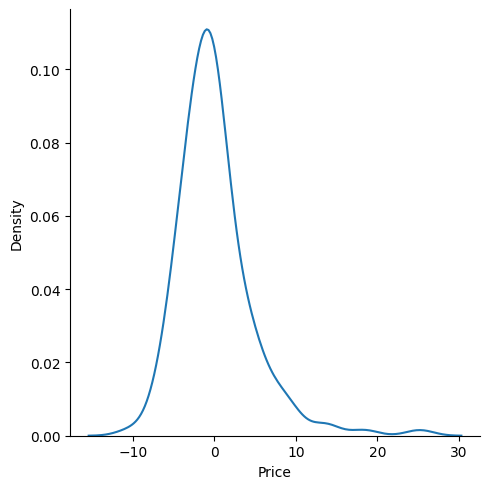

In [88]:
## Prediction
residuals = Y_test - Y_pred
## plot these residuals
sns.displot(residuals,kind = 'kde')

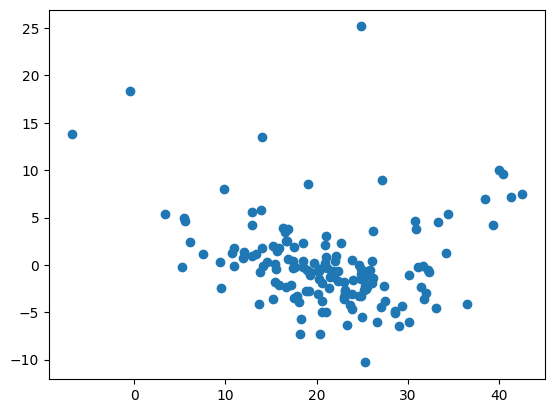

In [89]:
## Scatter plot WRT predications and residuals
## Uniform distribution indicates model is performing well
plt.scatter(Y_pred,residuals)

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))

3.162709871457406
21.517444231177212
4.638689926172821


In [91]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)

0.7112260057484932


**New Data Prediction**

In [92]:
X_train[0].reshape(1,-1)

array([[-0.41425879, -0.50512499, -1.29214218, -0.28154625, -0.85108479,
         0.14526384, -0.365584  ,  1.08162833, -0.74617905, -1.11279004,
         0.18727079,  0.39651419, -1.01531611]])

In [93]:
regression.predict(X_train[0].reshape(1,-1))

array([25.28876411])

Pickling the Model File for Deployment

In [94]:
import pickle

In [95]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [96]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [97]:
# Prediction
pickle_model.predict(X_train[0].reshape(1,-1))

array([25.28876411])